In [1]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp9Y44qy/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp9Y44qy/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp9Y44qy/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp9Y44qy/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp9Y44qy/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp9Y44qy/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//Rtmp9Y44qy/downloaded_packages


In [1]:
objective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/objective_table.csv")

# Visualise MOS distribution

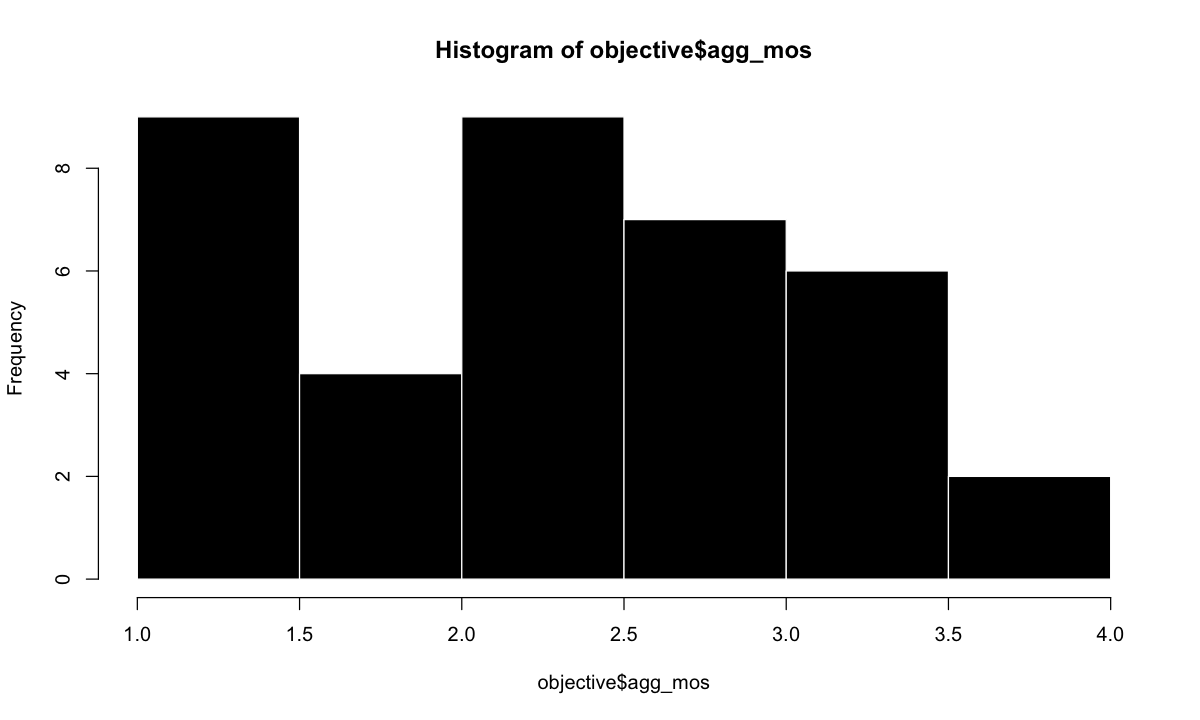

In [27]:
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")  # set background color to white
hist(objective$agg_mos,
     col = "black",
     border = "white")

# BIG regression
### fit with all variables

In [4]:
fit <- lm(agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, data = objective)
summary(fit)


Call:
lm(formula = agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + avg_down_google + avg_up_google + avg_rtt_google + 
    sd_down_google + sd_up_google + sd_rtt_google + distance + 
    telstra_distance + urban + line_of_sight, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98517 -0.28766  0.04301  0.23465  0.81743 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)       3.437917   8.425826   0.408    0.697
avg_up_ellen     -0.004429   0.049231  -0.090    0.931
avg_down_ellen    0.002789   0.059790   0.047    0.964
avg_rtt_ellen    -0.049850   0.166752  -0.299    0.775
avg_ellen_jitter -0.059594   0.138938  -0.429    0.68

In [5]:
cor_matrix <- cor(objective[, c("avg_up_ellen", "avg_down_ellen", "avg_rtt_ellen", 
                                "avg_ellen_jitter", "avg_pl_ellen", "avg_up_aadya", 
                                "avg_down_aadya", "avg_rtt_aadya", "avg_jitter_aadya", 
                                "avg_pl_aadya", "sd_up_ellen", "sd_down_ellen", 
                                "sd_rtt_ellen", "sd_jitter_ellen", "sd_pl_ellen", 
                                "sd_up_aadya", "sd_down_aadya", "sd_rtt_aadya", 
                                "sd_jitter_aadya", "sd_pl_aadya", "avg_down_google", 
                                "avg_up_google", "avg_rtt_google", "sd_down_google", 
                                "sd_up_google", "sd_rtt_google", "distance", 
                                "telstra_distance", "line_of_sight")], use = "complete.obs")

# View correlation matrix
cor_matrix

,avg_up_ellen,avg_down_ellen,avg_rtt_ellen,avg_ellen_jitter,avg_pl_ellen,avg_up_aadya,avg_down_aadya,avg_rtt_aadya,avg_jitter_aadya,avg_pl_aadya,...,sd_pl_aadya,avg_down_google,avg_up_google,avg_rtt_google,sd_down_google,sd_up_google,sd_rtt_google,distance,telstra_distance,line_of_sight
avg_up_ellen,1.00000000,0.03657220,-0.308469491,-0.32965725,0.169800548,0.60268898,0.20389659,-0.35586526,-0.25038841,-0.089608631,...,-0.132429662,0.062623866,0.26019793,0.170506554,0.08057222,0.276751473,-0.16913640,-0.09479815,-0.29443053,0.54191179
avg_down_ellen,0.03657220,1.00000000,-0.083756973,-0.49035976,-0.198655591,0.37071995,0.63511563,-0.14811594,-0.50802734,-0.151047189,...,-0.227410672,0.461210464,0.06760776,0.270388174,0.50722879,0.466945797,0.08273041,0.26151966,0.25647379,0.05955623
avg_rtt_ellen,-0.30846949,-0.08375697,1.000000000,0.60156865,-0.260778206,-0.16899929,-0.05358969,0.54197384,0.29875629,0.039254331,...,0.069706878,0.078592643,0.28519090,0.003881135,0.31195821,0.370034814,-0.34065489,0.26293079,0.35052982,0.21113251
avg_ellen_jitter,-0.32965725,-0.49035976,0.601568655,1.00000000,0.045103194,-0.16389477,-0.11570921,0.20531590,0.24689866,0.311844200,...,0.357516263,-0.077192642,0.11129471,-0.149891757,-0.02558558,0.081970626,-0.12944435,-0.06583197,0.08587397,0.13807572
avg_pl_ellen,0.16980055,-0.19865559,-0.260778206,0.04510319,1.000000000,0.10926139,-0.05282086,-0.39696551,-0.13506080,-0.068028527,...,-0.065222188,0.070124466,0.01427361,-0.071384361,-0.06636230,-0.048280198,-0.08626267,0.22559234,0.15384990,-0.10803018
avg_up_aadya,0.60268898,0.37071995,-0.168999285,-0.16389477,0.109261392,1.00000000,0.47075582,-0.40235195,-0.39448213,-0.102699215,...,-0.134473906,0.183069650,0.31114243,0.065874925,0.30250497,0.519569113,-0.14755032,0.02676769,-0.11036335,0.54868769
avg_down_aadya,0.20389659,0.63511563,-0.053589692,-0.11570921,-0.052820859,0.47075582,1.00000000,-0.33611232,-0.63241316,-0.202620149,...,-0.245055345,0.465686446,0.13084040,0.219763818,0.44639538,0.533269649,0.07720417,0.19562885,0.04953779,0.29789109
avg_rtt_aadya,-0.35586526,-0.14811594,0.541973836,0.20531590,-0.396965507,-0.40235195,-0.33611232,1.00000000,0.57407142,0.020276691,...,0.053160779,0.032307128,-0.10921669,0.157824897,0.18188000,-0.044805128,-0.13913202,0.15205414,0.33298397,-0.01456949
avg_jitter_aadya,-0.25038841,-0.50802734,0.298756287,0.24689866,-0.135060801,-0.39448213,-0.63241316,0.57407142,1.00000000,0.165918132,...,0.181464908,-0.214169476,-0.12299113,-0.118829474,-0.16786499,-0.218838757,-0.00830538,-0.06396707,0.04401904,-0.02879433
avg_pl_aadya,-0.08960863,-0.15104719,0.039254331,0.31184420,-0.068028527,-0.10269922,-0.20262015,0.02027669,0.16591813,1.000000000,...,0.963782597,0.032804115,-0.20576446,0.281655815,0.21571731,-0.006473326,-0.28139593,-0.07857573,-0.09778075,-0.08654927


# Log transformed

In [2]:
fit_logs <- lm(agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + log(avg_up_aadya) + log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + log(avg_down_google) + log(avg_up_google) + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, data = objective)

# LASSO

In [3]:
cv_alpha <- function(x, y, nfolds = 5) {
  alphas <- seq(0, 1, by = 0.1)
  cv_errors <- numeric(length(alphas))
  
  for (i in seq_along(alphas)) {
    fit <- cv.glmnet(x, y, alpha = alphas[i], nfolds = nfolds)
    cv_errors[i] <- min(fit$cvm)
  }
  
  best_alpha <- alphas[which.min(cv_errors)]
  return(best_alpha)}
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-8



Best alpha: 0.4 
[1] 0.2022448


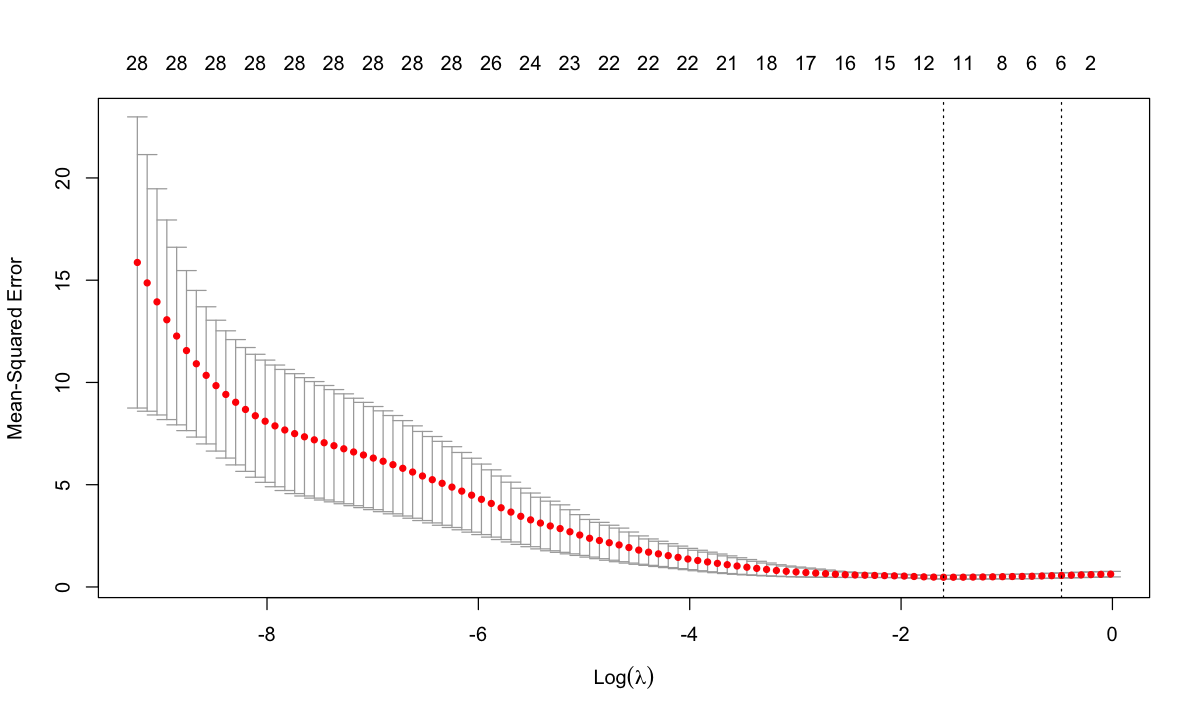

In [13]:
library(glmnet)

# Prepare the data (ensure your response variable is numeric)
x <- model.matrix(agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
                    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + 
                    log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + 
                    avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
                    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
                    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + 
                    sd_jitter_aadya + sd_pl_aadya + log(avg_down_google) + 
                    log(avg_up_google) + avg_rtt_google + 
                    sd_down_google + sd_up_google + sd_rtt_google + 
                    distance + telstra_distance, data = objective)

y <- objective$agg_mos

# Fit Lasso regression model (alpha = 1 for Lasso)
lasso_model <- glmnet(x, y, alpha = 1)
# Find the best alpha
best_alpha <- cv_alpha(x, y)
cat("Best alpha:", best_alpha, "\n")

# Fit the model with the best alpha
cv_model_best <- cv.glmnet(x, y, alpha = best_alpha)

# Plot the cross-validation curve
par(bg= "white")
plot(cv_model_best)

# Get the best lambda
best_lambda <- cv_model_best$lambda.min
print(best_lambda)

# Fit the final model with the best alpha and lambda
final_model_best <- glmnet(x, y, alpha = best_alpha, lambda = best_lambda)
selected_vars <- rownames(coef(final_model_best))[-1][coef(final_model_best)[-1, 1] != 0]

# Create a formula for the selected variables
formula <- as.formula(paste("agg_mos ~", paste(selected_vars, collapse = " + ")))

### refit lasso model
necessary to get the pvalues output


Call:
glm(formula = formula, data = objective)

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)          1.624300   1.046378   1.552  0.13316   
log(avg_down_ellen)  0.419474   0.294291   1.425  0.16642   
avg_rtt_ellen       -0.036338   0.028869  -1.259  0.21977   
avg_ellen_jitter    -0.007538   0.013789  -0.547  0.58948   
log(avg_up_aadya)    0.242706   0.145601   1.667  0.10801   
log(avg_down_aadya)  0.188200   0.240283   0.783  0.44084   
avg_jitter_aadya     0.005340   0.011188   0.477  0.63729   
sd_up_ellen         -0.029962   0.014711  -2.037  0.05240 . 
sd_up_aadya         -0.048315   0.014980  -3.225  0.00349 **
sd_rtt_aadya        -0.017004   0.041093  -0.414  0.68256   
log(avg_up_google)  -0.161383   0.158242  -1.020  0.31757   
sd_rtt_google       -0.031970   0.011005  -2.905  0.00757 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.2433274)

    Null d

[1] 0.1644104

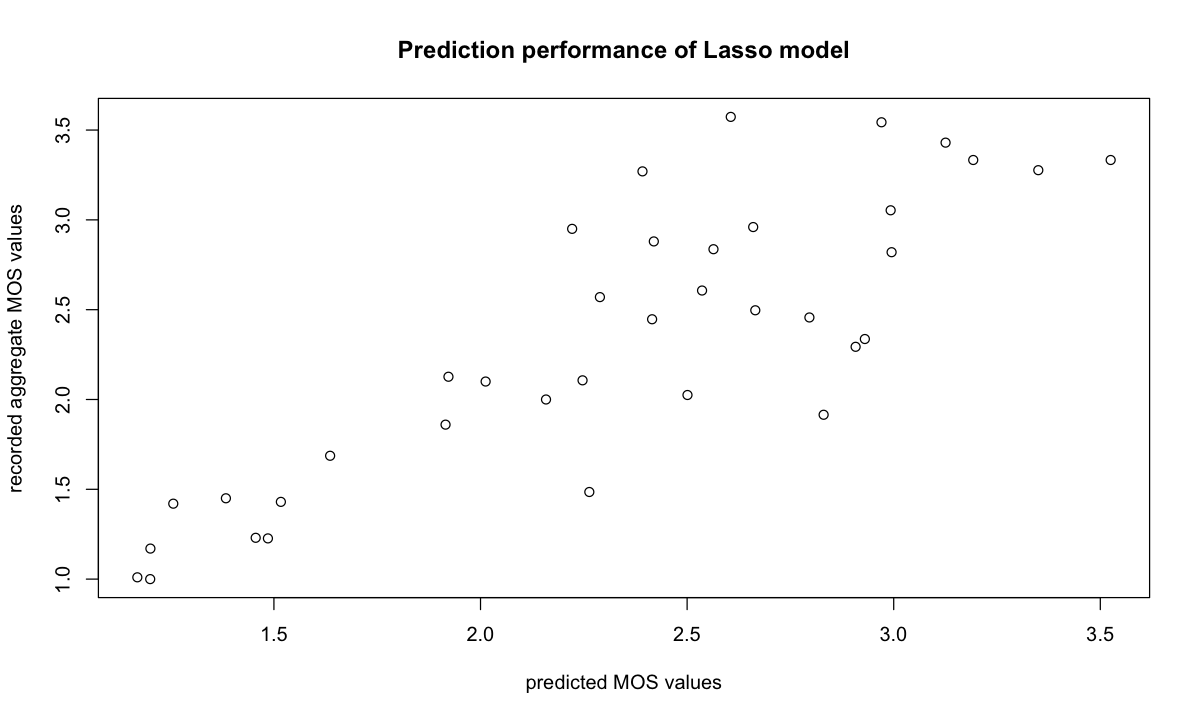

In [16]:
lasso_model <- glm(formula, data = objective)
summary(lasso_model)
par(bg= "white")
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(lasso_model, objective), objective$agg_mos, main="Prediction performance of Lasso model", ylab= "recorded aggregate MOS values", xlab="predicted MOS values")
#plot(lasso_model$fitted.values, resid(lasso_model), 
    # main = "Residuals vs Predicted Mean Opinon Score (MOS)", 
    # xlab = "Predicted MOS values", 
    # ylab = "Residuals")
abline(h = 0, col = "red")
predictions <- predict(lasso_model, objective)
mean((objective$agg_mos - predictions)^2)

In [12]:
# Assuming final_model_best is already fitted
# Extract coefficients
lasso_coefficients <- coef(final_model_best)

# Display coefficients
print("Lasso Coefficients:")
print(lasso_coefficients)

# Convert coefficients to a data frame for easier handling
coef_summary <- as.data.frame(as.matrix(lasso_coefficients))
coef_summary$Variable <- rownames(coef_summary)
colnames(coef_summary) <- c("Estimate", "Variable")
coef_summary <- coef_summary[coef_summary$Estimate != 0, ]  # Keep only non-zero coefficients

# Display the coefficients
print(coef_summary)

# To get p-values, we need to fit a standard logistic regression model using the selected variables
selected_vars <- rownames(coef(final_model_best))[-1][coef(final_model_best)[-1, 1] != 0]
formula <- as.formula(paste("agg_mos ~", paste(selected_vars, collapse = " + ")))

# Fit the logistic regression model
logistic_model <- glm(formula, data = objective, family = "binomial")

# Get summary to extract p-values
summary_output <- summary(logistic_model)

# Extract coefficients and p-values
coef_summary_logistic <- data.frame(
  Estimate = summary_output$coefficients[, "Estimate"],
  `Std. Error` = summary_output$coefficients[, "Std. Error"],
  `z value` = summary_output$coefficients[, "z value"],
  `Pr(>|z|)` = summary_output$coefficients[, "Pr(>|z|)"]
)

# Display the results
print("Logistic Model Coefficients and P-values:")
print(coef_summary_logistic)


[1] "Lasso Coefficients:"
30 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)           1.935473921
(Intercept)           .          
log(avg_up_ellen)     .          
log(avg_down_ellen)   0.332820034
avg_rtt_ellen        -0.027860144
avg_ellen_jitter     -0.006223799
avg_pl_ellen          .          
log(avg_up_aadya)     0.118680442
log(avg_down_aadya)   0.084719773
avg_rtt_aadya         .          
avg_jitter_aadya      .          
avg_pl_aadya          .          
sd_up_ellen          -0.010704389
sd_down_ellen         .          
sd_rtt_ellen          .          
sd_jitter_ellen       .          
sd_pl_ellen           .          
sd_up_aadya          -0.024653833
sd_down_aadya         .          
sd_rtt_aadya         -0.004879037
sd_jitter_aadya       .          
sd_pl_aadya           .          
log(avg_down_google)  .          
log(avg_up_google)   -0.038769080
avg_rtt_google        .          
sd_down_google        .          
sd_up_google  

ERROR: Error in eval(family$initialize): y values must be 0 <= y <= 1


[1] "Mean Squared Error: 0.228366938469648"


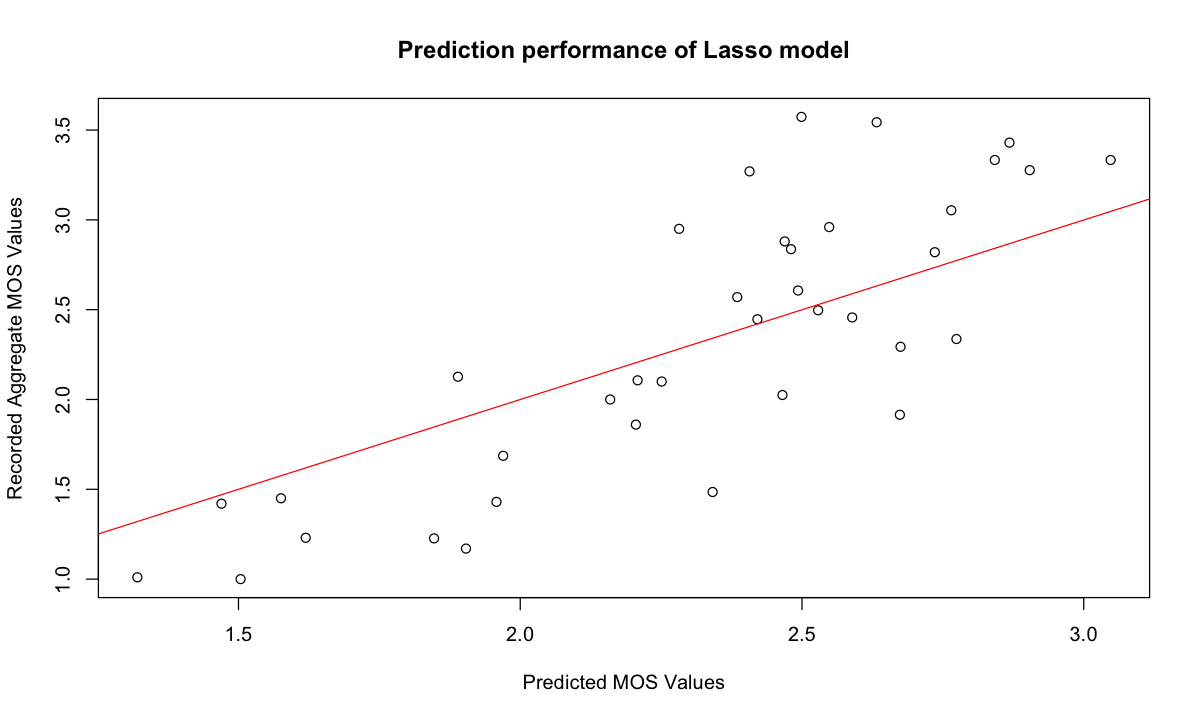

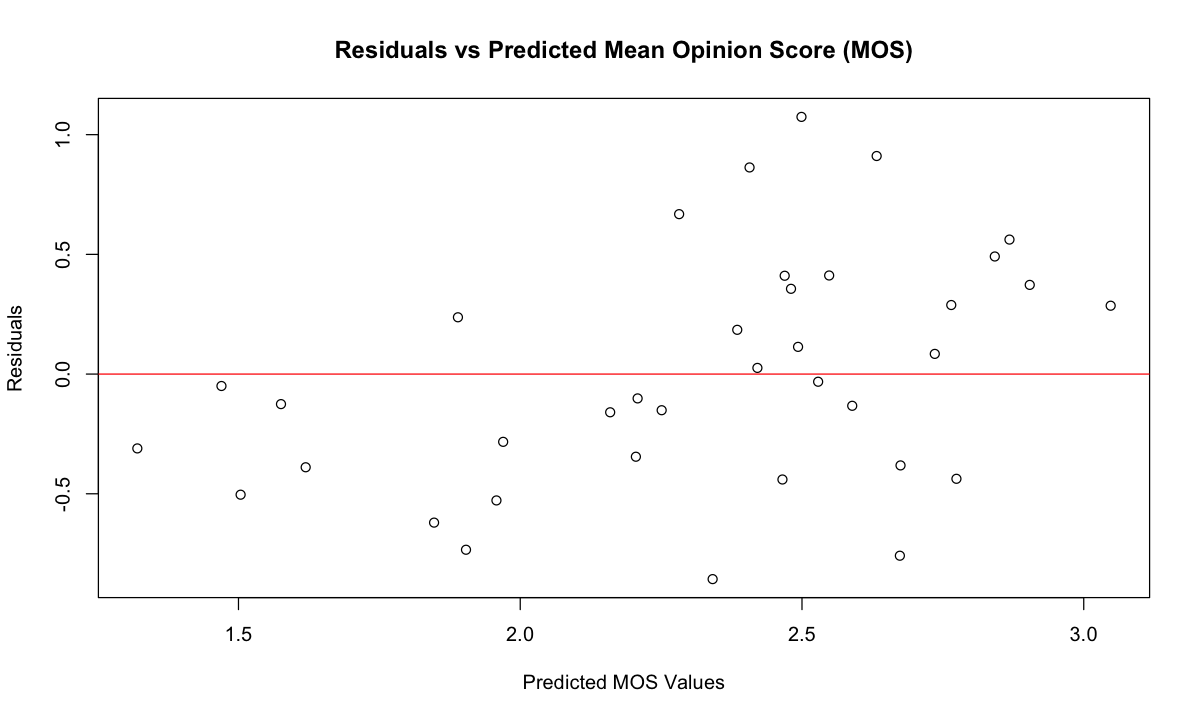

In [11]:
# Use the final Lasso model for predictions
predictions <- predict(final_model_best, newx = x)  # Use the model fitted with glmnet

# Calculate Mean Squared Error for the predictions
mse <- mean((objective$agg_mos - predictions)^2)
print(paste("Mean Squared Error:", mse))

# Plotting the prediction performance
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predictions, objective$agg_mos, main="Prediction performance of Lasso model", 
     ylab= "Recorded Aggregate MOS Values", xlab="Predicted MOS Values")
abline(0, 1, col = "red")  # Reference line for perfect predictions

# Plot Residuals vs. Predicted values
residuals <- objective$agg_mos - predictions
plot(predictions, residuals, 
     main = "Residuals vs Predicted Mean Opinion Score (MOS)", 
     xlab = "Predicted MOS Values", 
     ylab = "Residuals")
abline(h = 0, col = "red")


# Penalised with logs

Start:  AIC=-39.66
agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + 
    distance + telstra_distance + urban + line_of_sight

                       Df Sum of Sq    RSS     AIC
- avg_ellen_jitter      1   0.00011 2.3712 -41.658
- sd_jitter_ellen       1   0.00043 2.3715 -41.653
- distance              1   0.00460 2.3757 -41.588
- sd_up_google          1   0.00673 2.3778 -41.555
- line_of_sight         1   0.00716 2.3783 -41.548
- sd_jitter_aadya       1   0.00860 2.3797 -41.526
- avg_rtt_ellen         1   0.00892 2.3800 -41.521
- sd_rtt_ellen          1   


Call:
lm(formula = agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + 
    avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + sd_pl_ellen + sd_up_aadya + 
    sd_rtt_aadya + sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_rtt_google + telstra_distance + 
    urban, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67867 -0.13882  0.01481  0.16166  0.60683 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -8.486471   1.830982  -4.635 0.000206 ***
log(avg_up_ellen)     0.273821   0.130493   2.098 0.050252 .  
log(avg_down_ellen)   0.648314   0.277330   2.338 0.031151 *  
avg_pl_ellen          0.110900   0.037754   2.937 0.008803 ** 
log(avg_up_aadya)     0.603133   0.145651   4.141 0.000614 ***
log(avg_down_aadya)   0.423520   0.258216   1.640 0.118326    
avg_rtt_aadya         0.198185   0.040136   4.938 0.0001

[1] 0.07261317

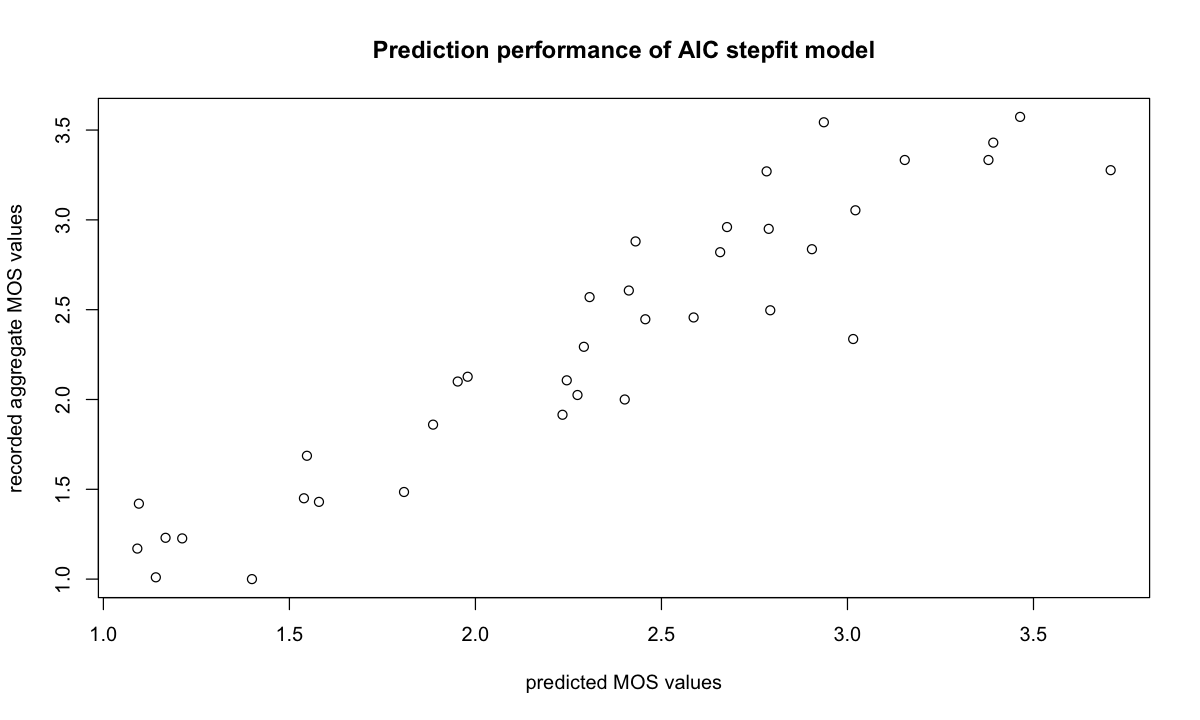

In [8]:
fit_aic_logs <- step(fit_logs)
summary(fit_aic_logs)
par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(fit_aic_logs, objective), objective$agg_mos, 
main = "Prediction performance of AIC stepfit model", 
xlab = "predicted MOS values", ylab = "recorded aggregate MOS values")
predictions <- predict(fit_aic_logs, objective)
mean((objective$agg_mos - predictions)^2)

Start:  AIC=10.28
agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + 
    distance + telstra_distance + urban + line_of_sight

                       Df Sum of Sq    RSS     AIC
- avg_ellen_jitter      1   0.00011 2.3712  6.6696
- sd_jitter_ellen       1   0.00043 2.3715  6.6745
- distance              1   0.00460 2.3757  6.7395
- sd_up_google          1   0.00673 2.3778  6.7727
- line_of_sight         1   0.00716 2.3783  6.7794
- sd_jitter_aadya       1   0.00860 2.3797  6.8018
- avg_rtt_ellen         1   0.00892 2.3800  6.8068
- sd_rtt_ellen          1   0


Call:
lm(formula = agg_mos ~ log(avg_down_ellen) + avg_pl_ellen + log(avg_up_aadya) + 
    avg_rtt_aadya + sd_pl_ellen + sd_up_aadya + sd_rtt_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_rtt_google + urban, 
    data = objective)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9421 -0.1923 -0.0001  0.1508  0.6111 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -6.315874   1.608072  -3.928 0.000719 ***
log(avg_down_ellen)   1.029791   0.225031   4.576 0.000148 ***
avg_pl_ellen          0.085381   0.034448   2.479 0.021342 *  
log(avg_up_aadya)     0.715395   0.133897   5.343 2.31e-05 ***
avg_rtt_aadya         0.136618   0.033692   4.055 0.000528 ***
sd_pl_ellen          -0.140018   0.053214  -2.631 0.015250 *  
sd_up_aadya          -0.056135   0.013335  -4.210 0.000362 ***
sd_rtt_aadya         -0.146258   0.047518  -3.078 0.005501 ** 
sd_pl_aadya           0.1

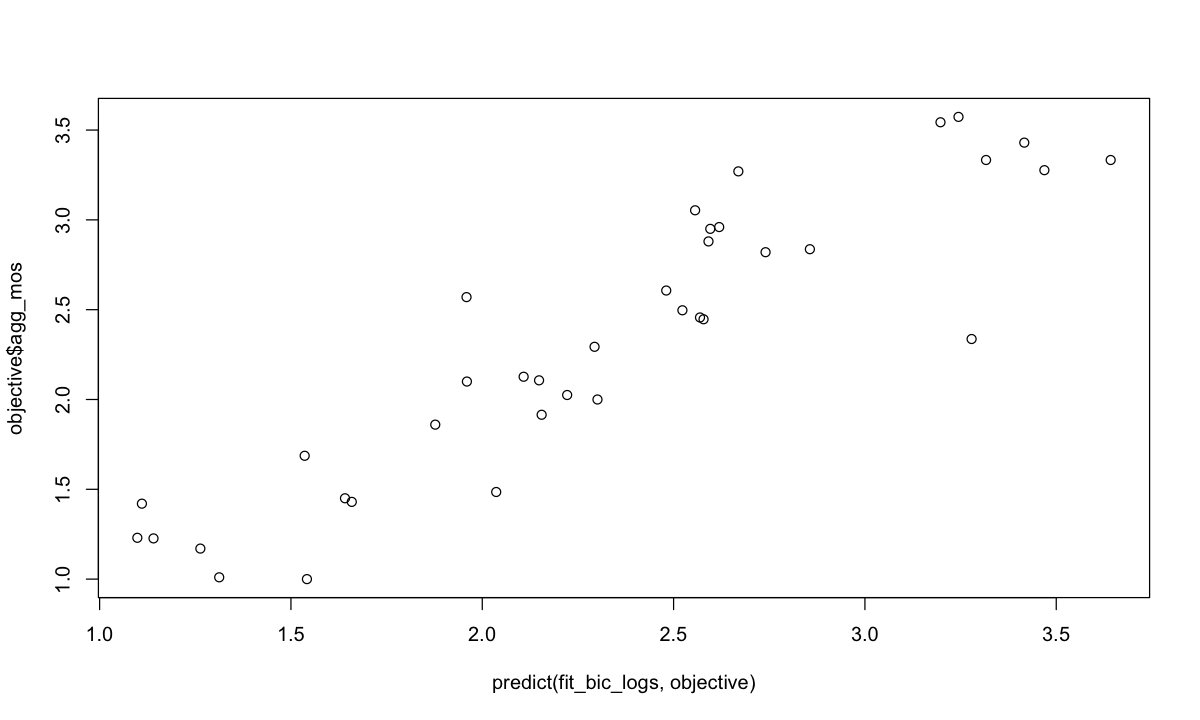

In [6]:
fit_bic_logs <- step(fit_logs, k = log(length(objective$agg_mos)))
summary(fit_bic_logs)
par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 6)
plot(predict(fit_bic_logs, objective), objective$agg_mos)

## PCA

In [ ]:
pca_result <- prcomp(objective[, c("avg_up_ellen", "avg_down_ellen", "avg_rtt_ellen", 
                                   "avg_ellen_jitter", "avg_pl_ellen", "avg_up_aadya", 
                                   "avg_down_aadya", "avg_rtt_aadya", "avg_jitter_aadya", 
                                   "avg_pl_aadya", "sd_up_ellen", "sd_down_ellen", 
                                   "sd_rtt_ellen", "sd_jitter_ellen", "sd_pl_ellen", 
                                   "sd_up_aadya", "sd_down_aadya", "sd_rtt_aadya", 
                                   "sd_jitter_aadya", "sd_pl_aadya", "avg_down_google", 
                                   "avg_up_google", "avg_rtt_google", "sd_down_google", 
                                   "sd_up_google", "sd_rtt_google", "distance", 
                                   "telstra_distance", "line_of_sight")], 
                    scale. = TRUE)  # Standardize the data before applying PCA

# View the PCA summary to see the proportion of variance explained by each component
summary(pca_result)

# Use the first few principal components that explain the most variance
pca_components <- pca_result$x[, 1:5]  # Replace 1:5 with the number of components you want to keep

# Fit a new model using the principal components
pca_model <- lm(agg_mos ~ pca_components, data = objective)

# View the summary of the new model
summary(pca_model)

### visualise against certain significant variables

In [8]:
library(ggplot2)
ggplot2(MOS_test, aes(x = avg_up_ellen, y = agg_MOS)) +
  geom_point(color = "blue") +
  labs(title = "MOS score and ellen avg upload speed", x = "avg_up_ellen", y = "agg_MOS") +
  theme_minimal()

ERROR: Error in ggplot2(MOS_test, aes(x = avg_up_ellen, y = agg_MOS)): could not find function "ggplot2"


### perform and plot the predictions

[1] 0.1315896

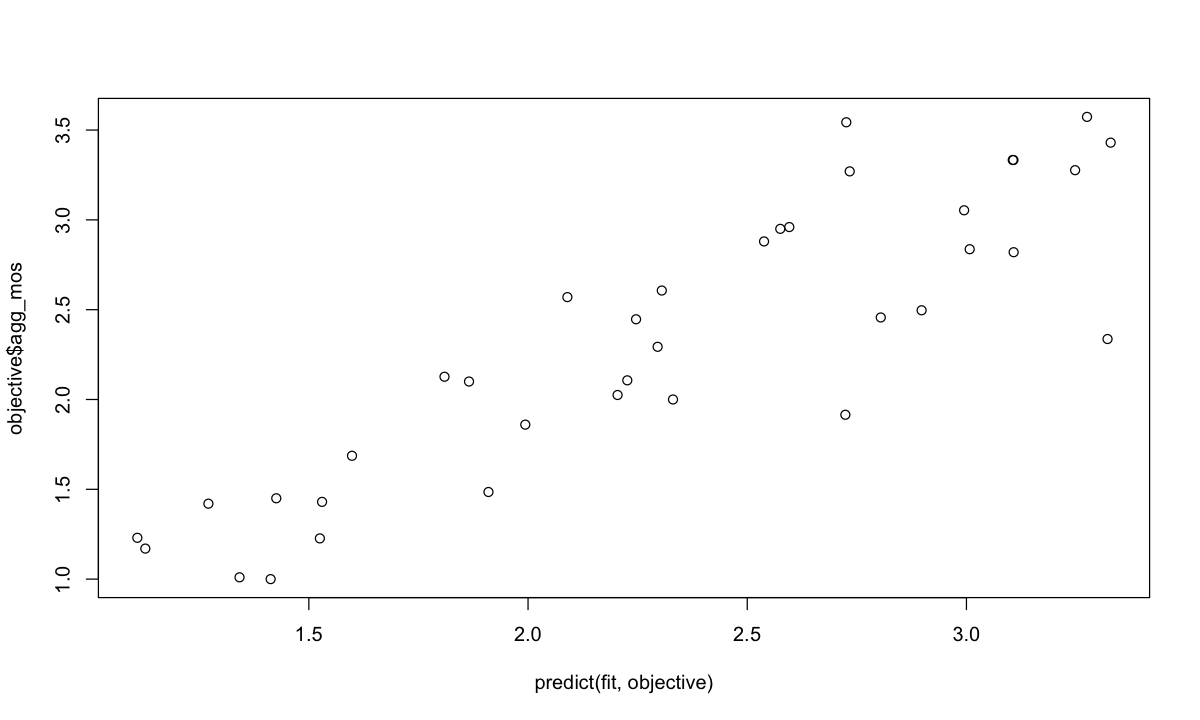

In [9]:
par(bg = "white")
predictions <- predict(fit, objective)
plot(predict(fit, objective), objective$agg_mos)
#calculate mean squared error
mean((predictions - objective$agg_mos)^2)

# Penalised regression 
### AIC

Start:  AIC=-13.04
agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS     AIC
- avg_rtt_google    1   0.00053 4.8693 -15.034
- sd_up_google      1   0.00115 4.8700 -15.030
- avg_down_ellen    1   0.00177 4.8706 -15.025
- line_of_sight     1   0.00242 4.8712 -15.020
- sd_pl_aadya       1   0.00421 4.8730 -15.007
- avg_up_ellen      1   0.00657 4.8754 -14.989
- telstra_distance  1   0.00905 4.8779 -14.970
- sd_jitter_aadya   1   0.00936 4.8782 -14.967
- sd_jitter_ellen   1   0.01043 4.8792 -14.


Call:
lm(formula = agg_mos ~ avg_rtt_ellen + avg_ellen_jitter + avg_down_aadya + 
    avg_rtt_aadya + avg_jitter_aadya + sd_down_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_google, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03552 -0.28758  0.01586  0.30450  0.88829 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.493976   0.820382   5.478 9.56e-06 ***
avg_rtt_ellen    -0.079887   0.025894  -3.085 0.004781 ** 
avg_ellen_jitter -0.014379   0.009400  -1.530 0.138181    
avg_down_aadya    0.018652   0.006442   2.896 0.007572 ** 
avg_rtt_aadya     0.029749   0.023918   1.244 0.224661    
avg_jitter_aadya -0.014605   0.010497  -1.391 0.175912    
sd_down_ellen     0.018149   0.011757   1.544 0.134748    
sd_pl_ellen      -0.166086   0.059734  -2.780 0.009960 ** 
sd_up_aadya      -0.029495   0.015282  -1.930 0.064574 .  
sd_down_aadya    -0.022243   0.011792  -1.886 0.070469 .  
sd_rtt_googl

[1] 0.1734116

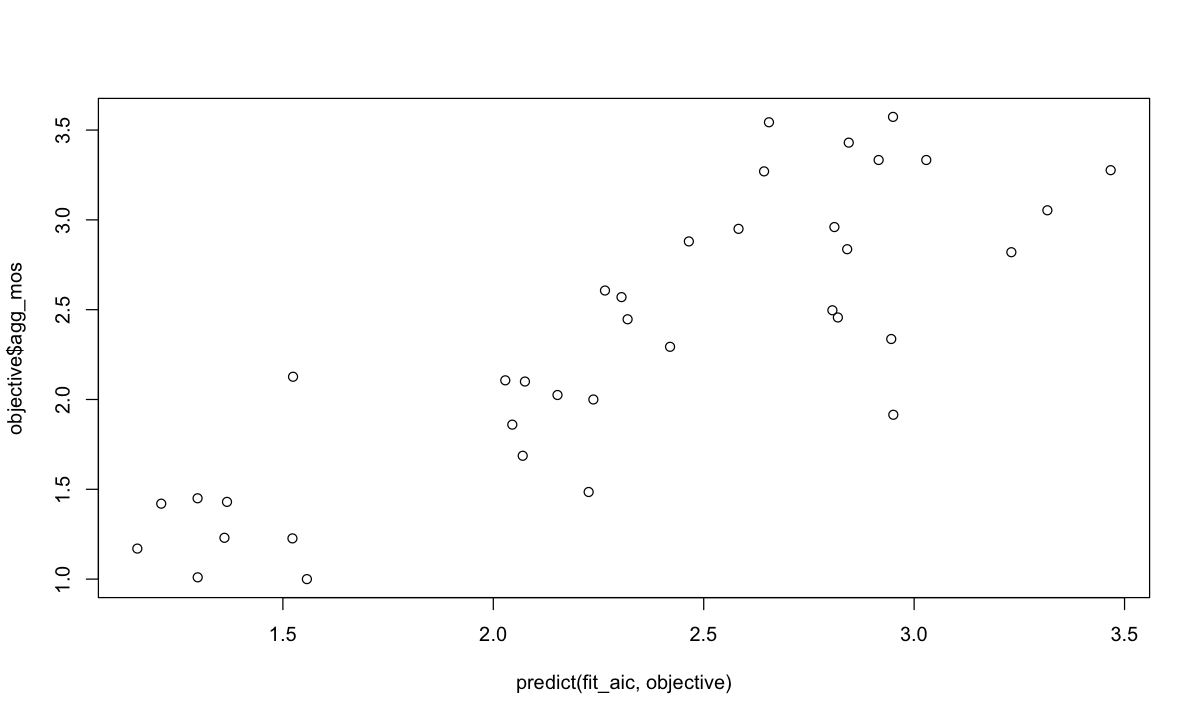

In [10]:
fit_aic <- step(fit) #stepwise regression to optimse a linear model
summary(fit_aic)
par(bg = "white")
plot(predict(fit_aic, objective), objective$agg_mos)
mean((predict(fit_aic, objective) - objective$agg_mos)^2)

### BIC

Start:  AIC=36.9
agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS    AIC
- avg_rtt_google    1   0.00053 4.8693 33.293
- sd_up_google      1   0.00115 4.8700 33.298
- avg_down_ellen    1   0.00177 4.8706 33.302
- line_of_sight     1   0.00242 4.8712 33.307
- sd_pl_aadya       1   0.00421 4.8730 33.321
- avg_up_ellen      1   0.00657 4.8754 33.339
- telstra_distance  1   0.00905 4.8779 33.358
- sd_jitter_aadya   1   0.00936 4.8782 33.360
- sd_jitter_ellen   1   0.01043 4.8792 33.368
- avg_ji


Call:
lm(formula = agg_mos ~ avg_rtt_ellen + avg_ellen_jitter + avg_down_aadya + 
    sd_down_ellen + sd_pl_ellen + sd_up_aadya + sd_down_aadya + 
    sd_rtt_google, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09609 -0.28454 -0.03049  0.26858  0.94250 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.855405   0.735984   6.597 3.73e-07 ***
avg_rtt_ellen    -0.073706   0.023119  -3.188 0.003509 ** 
avg_ellen_jitter -0.017867   0.009078  -1.968 0.059024 .  
avg_down_aadya    0.020805   0.005343   3.894 0.000558 ***
sd_down_ellen     0.021850   0.011612   1.882 0.070311 .  
sd_pl_ellen      -0.154163   0.058499  -2.635 0.013548 *  
sd_up_aadya      -0.027040   0.015324  -1.765 0.088541 .  
sd_down_aadya    -0.023767   0.011783  -2.017 0.053363 .  
sd_rtt_google    -0.045452   0.010480  -4.337 0.000169 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5009 on 28 

[1] 0.1898951

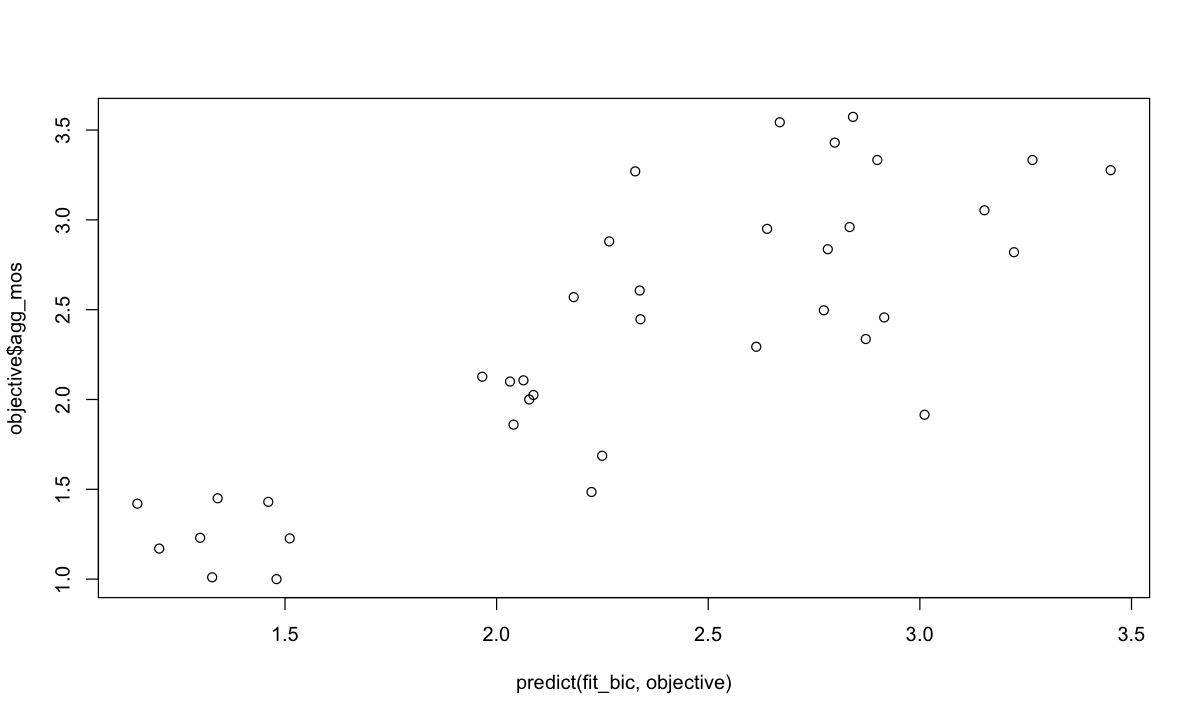

In [13]:
fit_bic <- step(fit, k = log(length(objective$agg_mos)))
summary(fit_bic)
par(bg = "white")
plot(predict(fit_bic, objective), objective$agg_mos)
mean((predict(fit_bic, objective) - objective$agg_mos)^2)

## one-sided regressions

### Ellen


Call:
lm(formula = e_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + 
    avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + 
    log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + 
    avg_pl_aadya + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + 
    sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + sd_down_aadya + 
    sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + log(avg_down_google) + 
    log(avg_up_google) + avg_rtt_google + sd_down_google + sd_up_google + 
    sd_rtt_google + distance + telstra_distance + urban + line_of_sight, 
    data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59391 -0.08691  0.00041  0.09634  0.53789 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)           4.109335   8.054579   0.510    0.628
log(avg_up_ellen)     0.299174   0.364487   0.821    0.443
log(avg_down_ellen)  -0.066548   1.211026  -0.055    0.958
avg_rtt_ellen        -0.116763   0.110583  -1.056    0.332


[1] 0.04251933

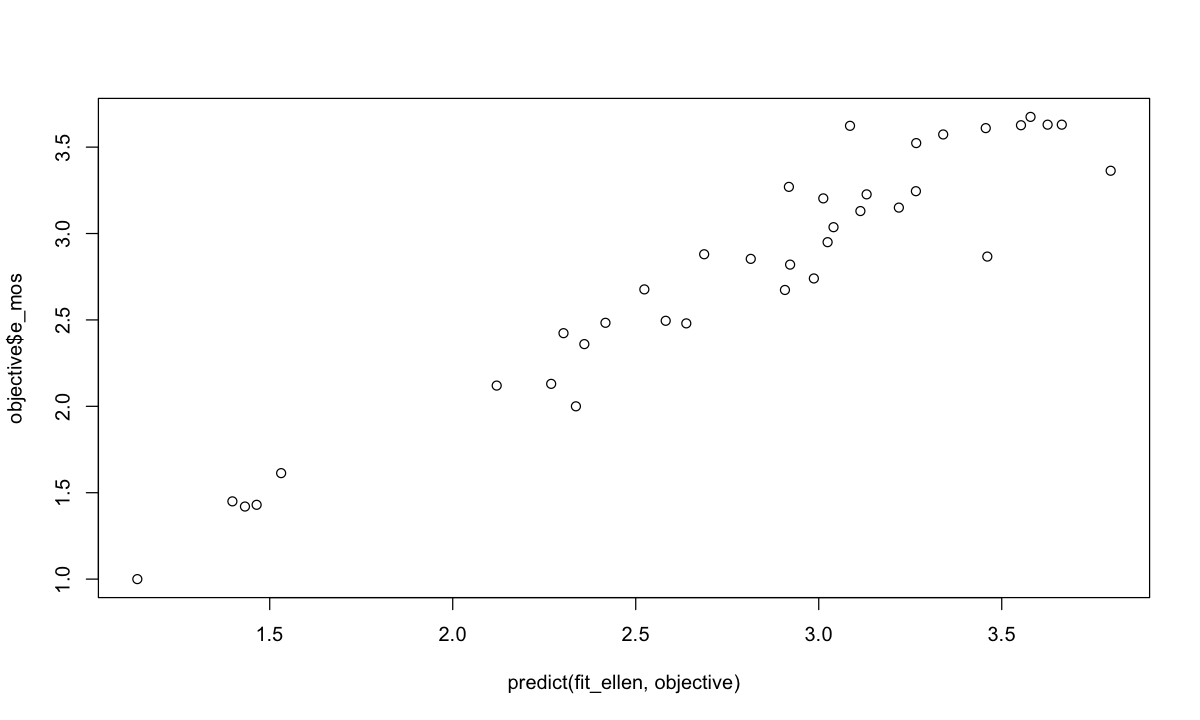

In [24]:
fit_ellen <- lm(e_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + log(avg_up_aadya) + log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + log(avg_down_google) + log(avg_up_google) + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, data = objective)
summary(fit_ellen)
par(bg = "white")
predictions <- predict(fit_ellen, objective)
plot(predict(fit_ellen, objective), objective$e_mos)
#calculate mean squared error
mean((predictions - objective$e_mos)^2)

Start:  AIC=-53.39
e_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS     AIC
- sd_jitter_ellen   1   0.00298 1.6391 -55.320
- avg_down_ellen    1   0.00728 1.6434 -55.223
- avg_up_google     1   0.01358 1.6497 -55.081
- sd_jitter_aadya   1   0.01798 1.6541 -54.983
- urban             1   0.02484 1.6610 -54.829
- avg_up_ellen      1   0.02970 1.6659 -54.722
- avg_down_google   1   0.03373 1.6699 -54.632
- sd_pl_ellen       1   0.05930 1.6955 -54.070
- avg_jitter_aadya  1   0.08007 1.7162 -53.61


Call:
lm(formula = e_mos ~ avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + 
    avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + 
    avg_pl_aadya + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + 
    sd_pl_ellen + sd_up_aadya + sd_rtt_aadya + sd_pl_aadya + 
    avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + 
    distance + telstra_distance, data = objective)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4551 -0.1547 -0.0192  0.1147  0.7355 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.437936   1.007590   6.389 1.22e-05 ***
avg_rtt_ellen    -0.096787   0.030109  -3.215 0.005789 ** 
avg_ellen_jitter -0.052286   0.020744  -2.521 0.023532 *  
avg_pl_ellen     -0.046312   0.034600  -1.338 0.200670    
avg_up_aadya     -0.011161   0.010688  -1.044 0.312935    
avg_down_aadya    0.012003   0.006779   1.771 0.096945 .  
avg_rtt_aadya     0.038986   0.036241   1.076 0.299042    
avg_jitter_aadya -0.

[1] 0.05150447

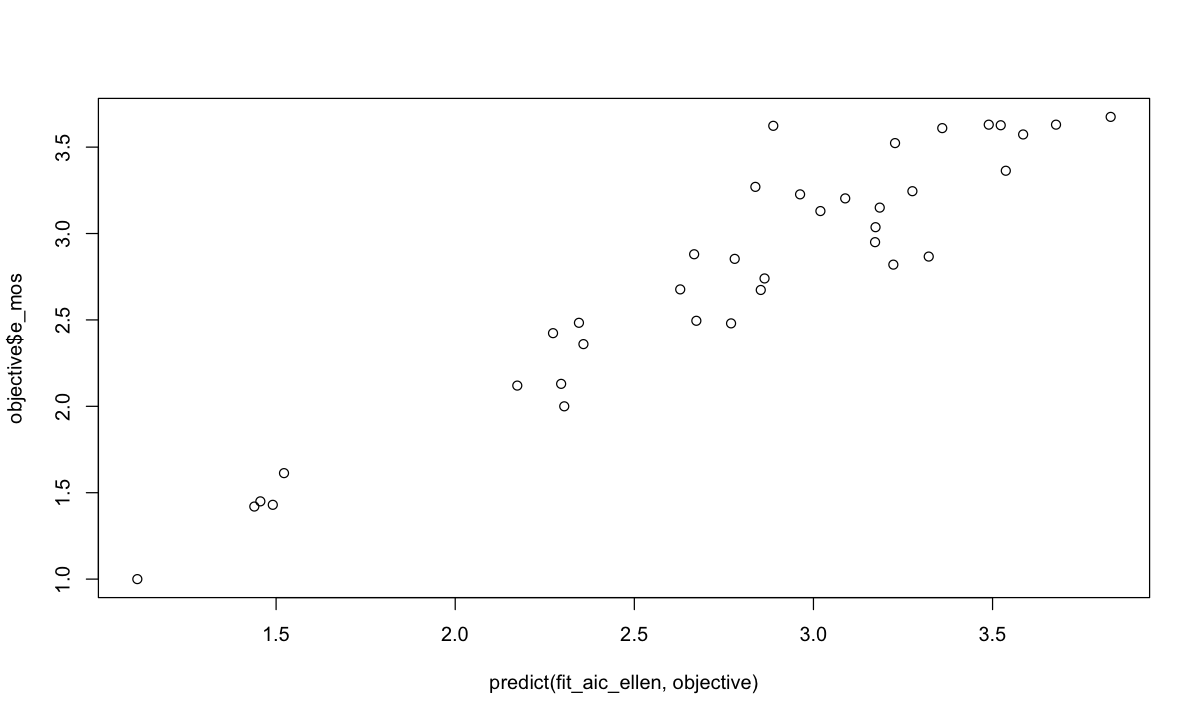

In [18]:
fit_aic_ellen <- step(fit_ellen) #stepwise regression to optimse a linear model
summary(fit_aic_ellen)
par(bg = "white")
plot(predict(fit_aic_ellen, objective), objective$e_mos)
mean((predict(fit_aic_ellen, objective) - objective$e_mos)^2)

Start:  AIC=-3.45
e_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS     AIC
- sd_jitter_ellen   1   0.00298 1.6391 -6.9922
- avg_down_ellen    1   0.00728 1.6434 -6.8952
- avg_up_google     1   0.01358 1.6497 -6.7537
- sd_jitter_aadya   1   0.01798 1.6541 -6.6551
- urban             1   0.02484 1.6610 -6.5019
- avg_up_ellen      1   0.02970 1.6659 -6.3940
- avg_down_google   1   0.03373 1.6699 -6.3044
- sd_pl_ellen       1   0.05930 1.6955 -5.7422
- avg_jitter_aadya  1   0.08007 1.7162 -5.2916


Call:
lm(formula = e_mos ~ avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + 
    avg_down_aadya + avg_rtt_google + sd_rtt_google, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.62667 -0.17939 -0.02726  0.15322  0.57977 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.984113   0.465980  10.696 9.33e-12 ***
avg_rtt_ellen    -0.048909   0.014632  -3.343 0.002237 ** 
avg_ellen_jitter -0.026246   0.006492  -4.043 0.000339 ***
avg_pl_ellen     -0.043901   0.019424  -2.260 0.031227 *  
avg_down_aadya    0.017906   0.003126   5.727 2.99e-06 ***
avg_rtt_google   -0.009407   0.003472  -2.710 0.011025 *  
sd_rtt_google    -0.038058   0.006683  -5.694 3.28e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3469 on 30 degrees of freedom
Multiple R-squared:  0.8112,	Adjusted R-squared:  0.7734 
F-statistic: 21.48 on 6 and 30 DF,  p-value: 1.274e-09


[1] 0.09755331

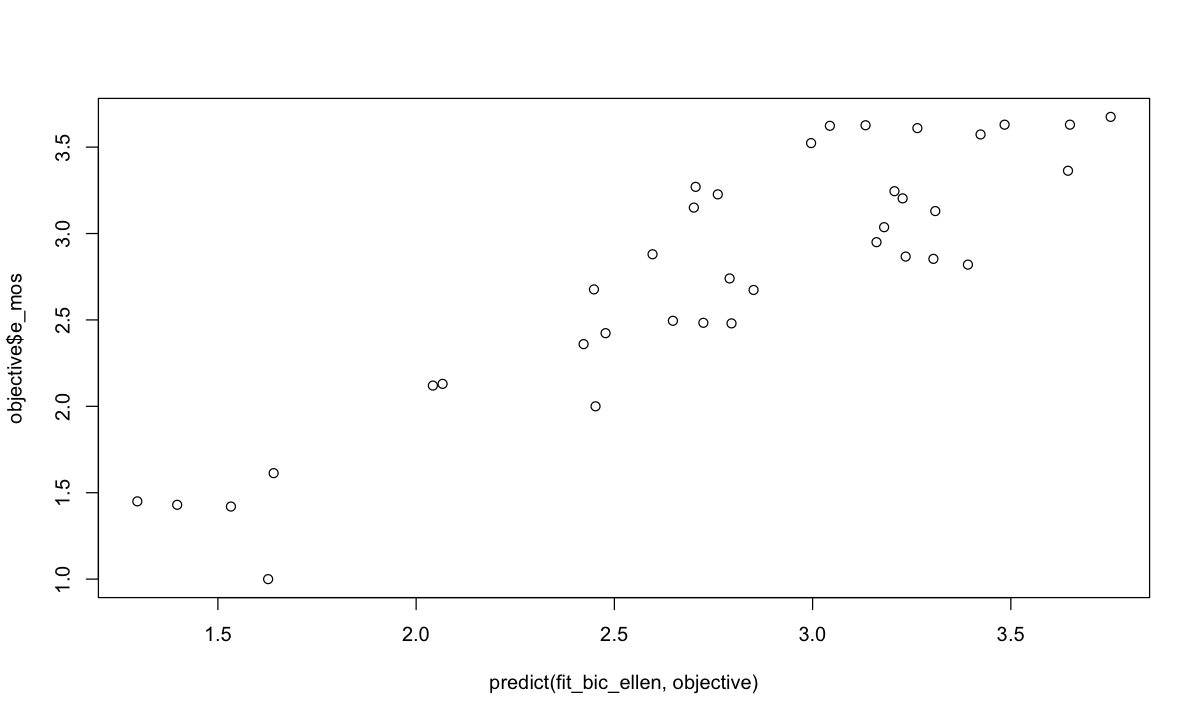

In [19]:
fit_bic_ellen <- step(fit_ellen, k = log(length(objective$e_mos)))
summary(fit_bic_ellen)
par(bg = "white")
plot(predict(fit_bic_ellen, objective), objective$e_mos)
mean((predict(fit_bic_ellen, objective) - objective$e_mos)^2)

### Aadya


Call:
lm(formula = a_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + avg_down_google + avg_up_google + avg_rtt_google + 
    sd_down_google + sd_up_google + sd_rtt_google + distance + 
    telstra_distance + urban + line_of_sight, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09407 -0.30017 -0.00481  0.33929  0.73107 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)       5.086e+00  1.005e+01   0.506    0.631
avg_up_ellen     -1.749e-02  5.874e-02  -0.298    0.776
avg_down_ellen   -8.536e-03  7.134e-02  -0.120    0.909
avg_rtt_ellen    -3.910e-02  1.990e-01  -0.197    0.851
avg_ellen_jitter -6.276e-02  1.658e-01  -0.379    

[1] 0.1873636

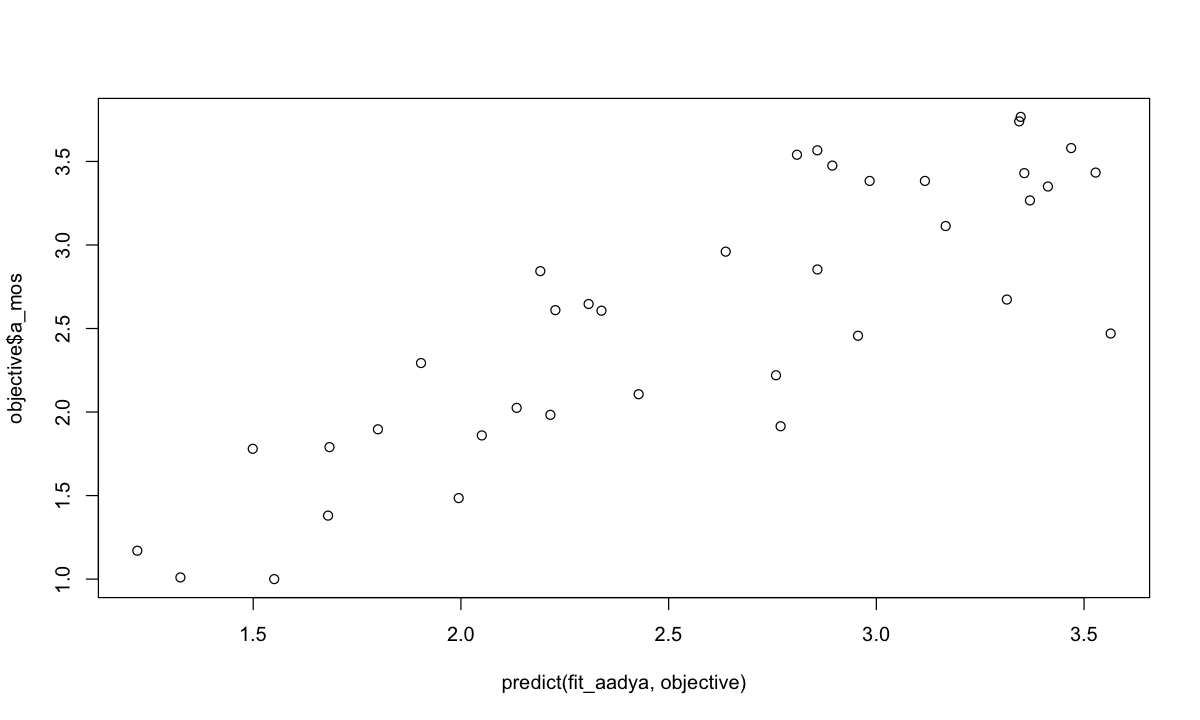

In [21]:
fit_aadya <- lm(a_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, data = objective)
summary(fit_aadya)
par(bg = "white")
predictions <- predict(fit_aadya, objective)
plot(predict(fit_aadya, objective), objective$a_mos)
#calculate mean squared error
mean((predictions - objective$a_mos)^2)

Start:  AIC=0.04
a_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS      AIC
- sd_jitter_aadya   1   0.00000 6.9325 -1.96405
- urban             1   0.00018 6.9326 -1.96312
- line_of_sight     1   0.00031 6.9328 -1.96241
- sd_pl_ellen       1   0.00126 6.9337 -1.95731
- sd_rtt_aadya      1   0.00277 6.9352 -1.94926
- sd_rtt_ellen      1   0.00280 6.9353 -1.94912
- avg_down_google   1   0.00291 6.9354 -1.94850
- avg_rtt_aadya     1   0.00707 6.9395 -1.92634
- sd_up_aadya       1   0.00807 6.9405


Call:
lm(formula = a_mos ~ avg_rtt_ellen + avg_down_aadya + avg_pl_aadya + 
    sd_up_ellen + sd_down_ellen + sd_down_aadya + sd_pl_aadya + 
    sd_rtt_google + distance, data = objective)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3590 -0.2721  0.1065  0.2766  1.2928 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.371309   0.790390   6.796 2.68e-07 ***
avg_rtt_ellen  -0.088425   0.021372  -4.137 0.000307 ***
avg_down_aadya  0.022992   0.006218   3.698 0.000979 ***
avg_pl_aadya    0.675109   0.478113   1.412 0.169364    
sd_up_ellen    -0.054890   0.016747  -3.278 0.002879 ** 
sd_down_ellen   0.035805   0.013292   2.694 0.012000 *  
sd_down_aadya  -0.040237   0.011911  -3.378 0.002232 ** 
sd_pl_aadya    -0.397920   0.305276  -1.303 0.203418    
sd_rtt_google  -0.041279   0.012977  -3.181 0.003671 ** 
distance       -0.359630   0.280093  -1.284 0.210064    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residu

[1] 0.2406179

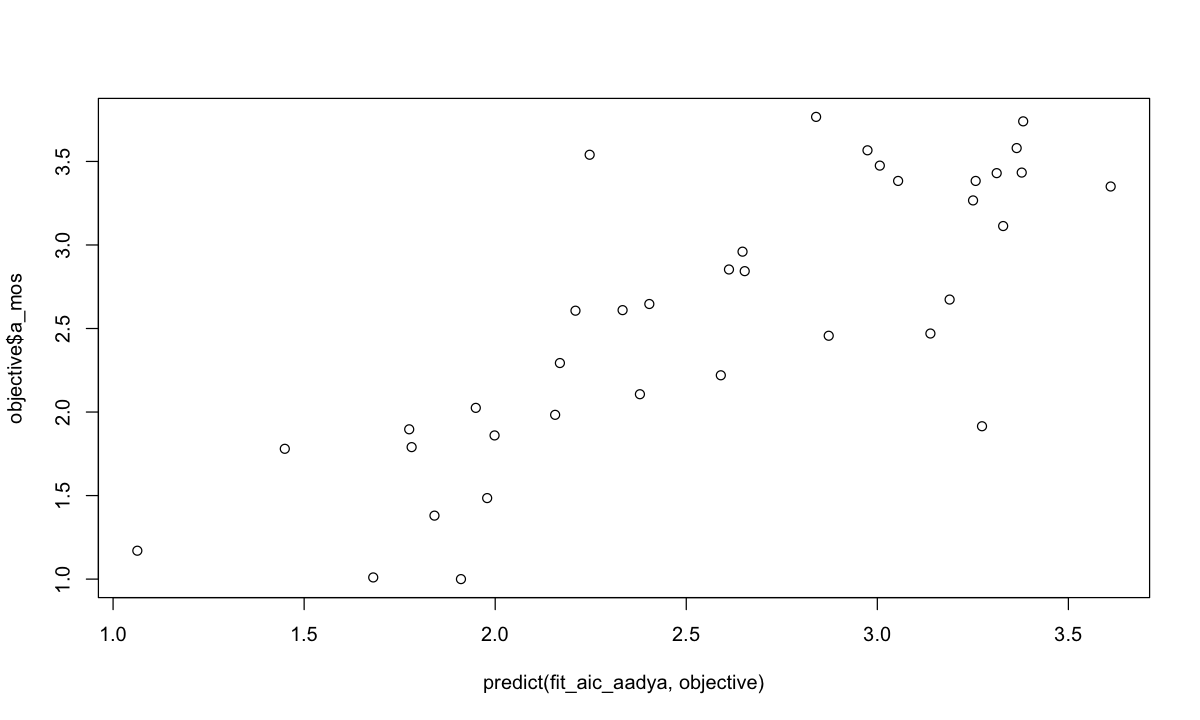

In [22]:
fit_aic_aadya <- step(fit_aadya) #stepwise regression to optimse a linear model
summary(fit_aic_aadya)
par(bg = "white")
plot(predict(fit_aic_aadya, objective), objective$a_mos)
mean((predict(fit_aic_aadya, objective) - objective$a_mos)^2)

Start:  AIC=49.97
a_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight

                   Df Sum of Sq    RSS    AIC
- sd_jitter_aadya   1   0.00000 6.9325 46.363
- urban             1   0.00018 6.9326 46.364
- line_of_sight     1   0.00031 6.9328 46.365
- sd_pl_ellen       1   0.00126 6.9337 46.370
- sd_rtt_aadya      1   0.00277 6.9352 46.378
- sd_rtt_ellen      1   0.00280 6.9353 46.378
- avg_down_google   1   0.00291 6.9354 46.379
- avg_rtt_aadya     1   0.00707 6.9395 46.401
- sd_up_aadya       1   0.00807 6.9405 46.407
- avg_rtt


Call:
lm(formula = a_mos ~ avg_rtt_ellen + avg_down_aadya + sd_up_ellen + 
    sd_down_ellen + sd_down_aadya + sd_rtt_google, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35774 -0.30269 -0.02139  0.37568  1.26183 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.312746   0.792804   6.701    2e-07 ***
avg_rtt_ellen  -0.091699   0.021694  -4.227 0.000204 ***
avg_down_aadya  0.021719   0.006112   3.553 0.001281 ** 
sd_up_ellen    -0.051926   0.016825  -3.086 0.004334 ** 
sd_down_ellen   0.029996   0.012457   2.408 0.022401 *  
sd_down_aadya  -0.034739   0.011654  -2.981 0.005655 ** 
sd_rtt_google  -0.041245   0.012159  -3.392 0.001964 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5911 on 30 degrees of freedom
Multiple R-squared:  0.5677,	Adjusted R-squared:  0.4812 
F-statistic: 6.565 on 6 and 30 DF,  p-value: 0.000166


[1] 0.2833056

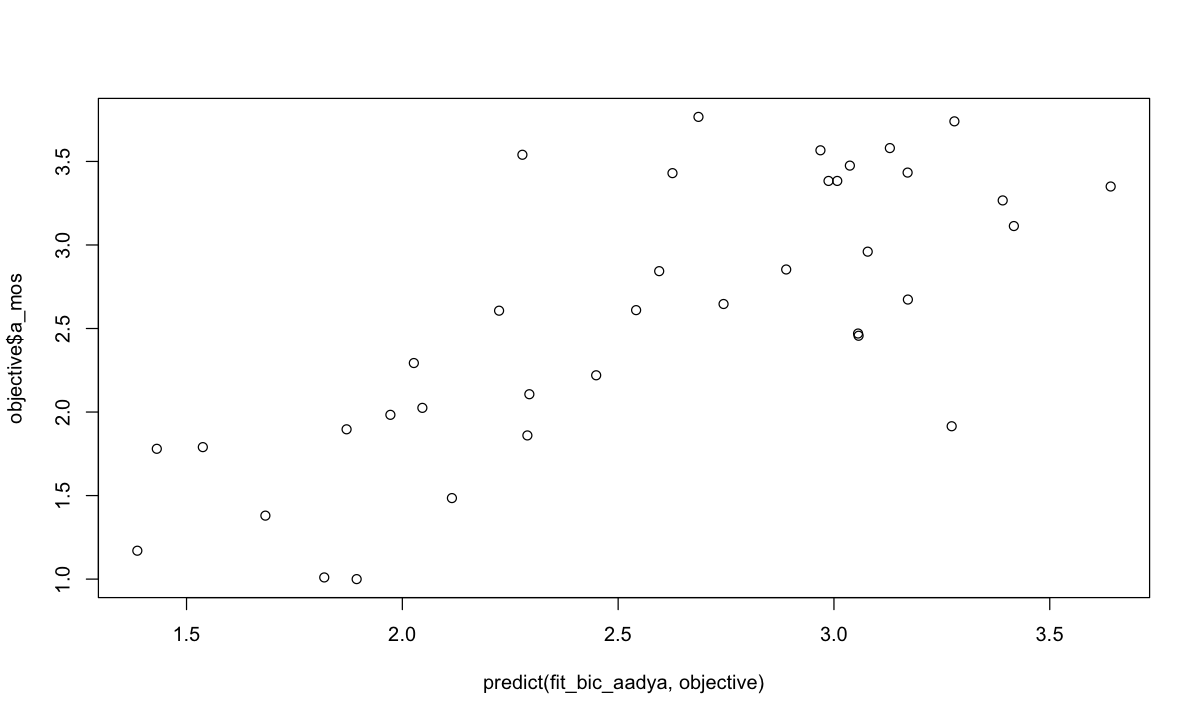

In [23]:
fit_bic_aadya <- step(fit_aadya, k = log(length(objective$a_mos)))
summary(fit_bic_aadya)
par(bg = "white")
plot(predict(fit_bic_aadya, objective), objective$a_mos)
mean((predict(fit_bic_aadya, objective) - objective$a_mos)^2)

# Urban only

In [55]:
objective$urban <- as.factor(objective$urban)

In [87]:
df_filtered <- objective[objective$urban == 0, ]
# Fit the linear regression model
model <- lm(agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + log(avg_up_aadya) + log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + log(avg_down_google) + log(avg_up_google) + telstra_distance + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + distance
    , data = df_filtered)

# Summary of the model
model_summary <- summary(model)

# Extract coefficients and p-values
coefficients <- model_summary$coefficients

# Create a data frame with coefficients, p-values, and significance stars
output_df <- data.frame(
  Estimate = coefficients[, "Estimate"],
  `P-value` = coefficients[, "Pr(>|t|)"],
  Significance = cut(coefficients[, "Pr(>|t|)"],
                     breaks = c(-Inf, 0.001, 0.01, 0.05, 0.1, Inf),
                     labels = c("***", "**", "*", ".", " "),
                     right = FALSE)
)

# Print the formatted output
cat("Coefficients, P-values, and Significance:\n")
print(output_df)

Coefficients, P-values, and Significance:
                         Estimate    P.value Significance
(Intercept)          -51.30789042 0.01907697            *
log(avg_up_ellen)      1.86923216 0.02163401            *
log(avg_down_ellen)    5.73820445 0.02686673            *
avg_rtt_ellen          1.47511686 0.01750984            *
avg_ellen_jitter       0.70087374 0.02801828            *
avg_pl_ellen           0.37059431 0.02024152            *
log(avg_up_aadya)      2.00816302 0.01417981            *
log(avg_down_aadya)    1.73198888 0.01985992            *
avg_rtt_aadya         -1.12236013 0.02608340            *
avg_jitter_aadya       0.56703246 0.01795709            *
avg_pl_aadya          10.63426955 0.01785308            *
sd_up_ellen           -0.54213315 0.02359370            *
sd_down_ellen         -0.42958741 0.01775768            *
sd_rtt_ellen          -2.52741580 0.02145256            *
sd_jitter_ellen        0.17219135 0.01944945            *
sd_pl_ellen            1.95901

In [91]:
# Load necessary library
library(glmnet)

# Prepare the data (ensure your response variable is numeric)
x <- model.matrix(agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
                    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + 
                    log(avg_down_aadya) + avg_rtt_aadya + avg_jitter_aadya + 
                    avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
                    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
                    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + 
                    sd_jitter_aadya + sd_pl_aadya + log(avg_down_google) + 
                    log(avg_up_google) + avg_rtt_google + 
                    sd_down_google + sd_up_google + sd_rtt_google + 
                    distance + telstra_distance, data = df_filtered)

y <- df_filtered$agg_mos

# Fit Lasso regression model (alpha = 1 for Lasso)
lasso_model <- glmnet(x, y, alpha = 1)


Best alpha: 0.7 
[1] 0.1854737


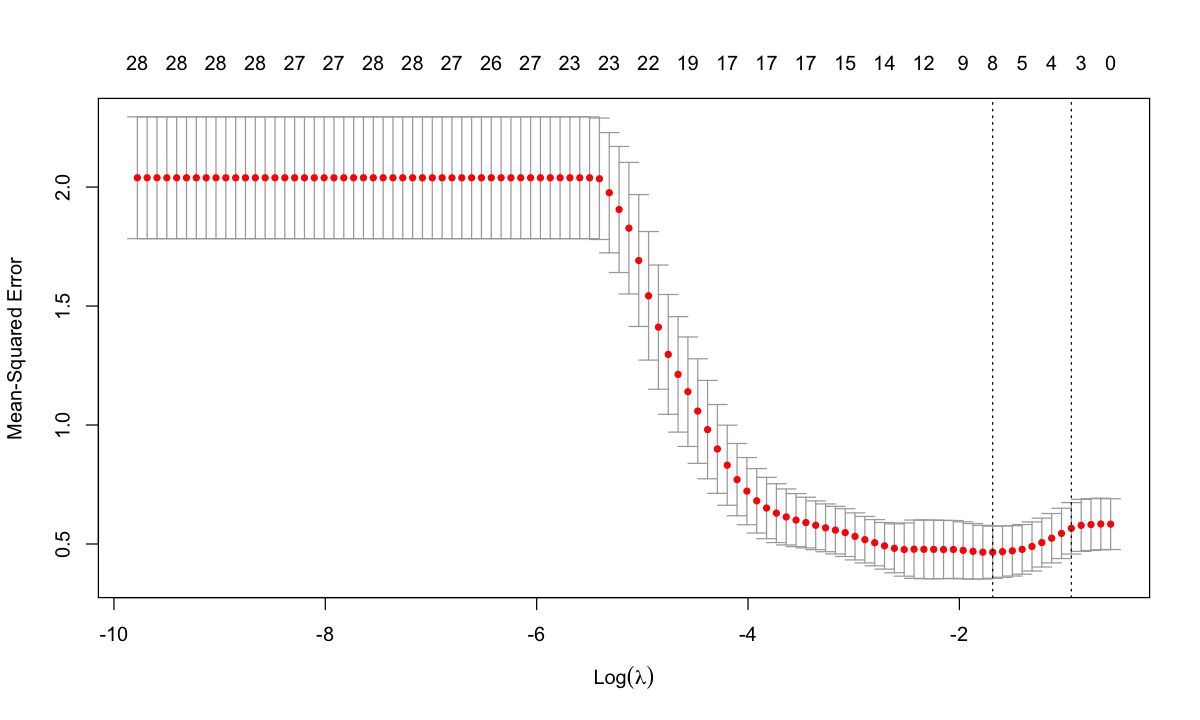

In [93]:
# Find the best alpha
best_alpha <- cv_alpha(x, y)
cat("Best alpha:", best_alpha, "\n")

# Fit the model with the best alpha
cv_model_best <- cv.glmnet(x, y, alpha = best_alpha)

# Plot the cross-validation curve
par(bg= "white")
plot(cv_model_best)

# Get the best lambda
best_lambda <- cv_model_best$lambda.min
print(best_lambda)

# Fit the final model with the best alpha and lambda
final_model_best <- glmnet(x, y, alpha = best_alpha, lambda = best_lambda)


In [94]:
selected_vars <- rownames(coef(final_model_best))[-1][coef(final_model_best)[-1, 1] != 0]

# Create a formula for the selected variables
formula <- as.formula(paste("agg_mos ~", paste(selected_vars, collapse = " + ")))

# Fit a standard logistic regression model
lasso_model <- glm(formula, data = df_filtered)
summary(lasso_model)


Call:
glm(formula = formula, data = df_filtered)

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)           1.5360335  1.1333850   1.355  0.18973   
log(avg_down_ellen)   0.5688995  0.2830849   2.010  0.05749 . 
avg_rtt_ellen        -0.0157275  0.0260198  -0.604  0.55202   
avg_ellen_jitter     -0.0007523  0.0122290  -0.062  0.95153   
log(avg_up_aadya)     0.2806099  0.1470320   1.908  0.07009 . 
avg_jitter_aadya     -0.0057232  0.0141924  -0.403  0.69084   
sd_up_aadya          -0.0480355  0.0146285  -3.284  0.00354 **
log(avg_down_google) -0.6089342  0.3432020  -1.774  0.09052 . 
log(avg_up_google)   -0.3035209  0.1787095  -1.698  0.10420   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.221452)

    Null deviance: 16.2555  on 29  degrees of freedom
Residual deviance:  4.6505  on 21  degrees of freedom
AIC: 49.21

Number of Fisher Scoring iterations: 2


Start:  AIC=-11.43
agg_mos ~ log(avg_up_ellen) + log(avg_down_ellen) + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + log(avg_up_aadya) + log(avg_down_aadya) + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + log(avg_down_google) + log(avg_up_google) + 
    avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google + 
    distance

                       Df Sum of Sq     RSS      AIC
- sd_pl_ellen           1   0.00101 0.70566 -14.9999
- avg_ellen_jitter      1   0.00284 0.70749 -14.9221
- sd_down_aadya         1   0.04629 0.75094 -13.1340
- log(avg_down_ellen)   1   0.05095 0.75561 -12.9482
- sd_rtt_google         1   0.07420 0.77885 -12.0394
- avg_rtt_aadya         1   0.07784 0.78249 -11.8994
<none>                              0.70465 -11.4318
- sd_up_aadya           1   0.19755 0.90220  -7.6287
- 

[1] 0.02543661

Coefficients, P-values, and Significance:
                         Estimate     P.value Significance
(Intercept)          -18.57353084 0.059033551            .
log(avg_up_ellen)      0.54191427 0.165879228             
avg_rtt_ellen          0.71364952 0.015486051            *
avg_pl_ellen           0.34298305 0.020721000            *
log(avg_up_aadya)      1.66432781 0.006898986           **
log(avg_down_aadya)    1.47293606 0.036326226            *
avg_rtt_aadya         -0.14380383 0.075099215            .
avg_jitter_aadya       0.28378003 0.016642168            *
avg_pl_aadya           5.53641127 0.007963641           **
sd_up_ellen           -0.10008188 0.019948216            *
sd_down_ellen         -0.18681670 0.012131478            *
sd_rtt_ellen          -0.67314030 0.015025759            *
sd_jitter_ellen        0.14610234 0.018605786            *
sd_up_aadya            0.06719721 0.155692736             
sd_down_aadya          0.02578670 0.267239288             
sd_rtt_aadya  

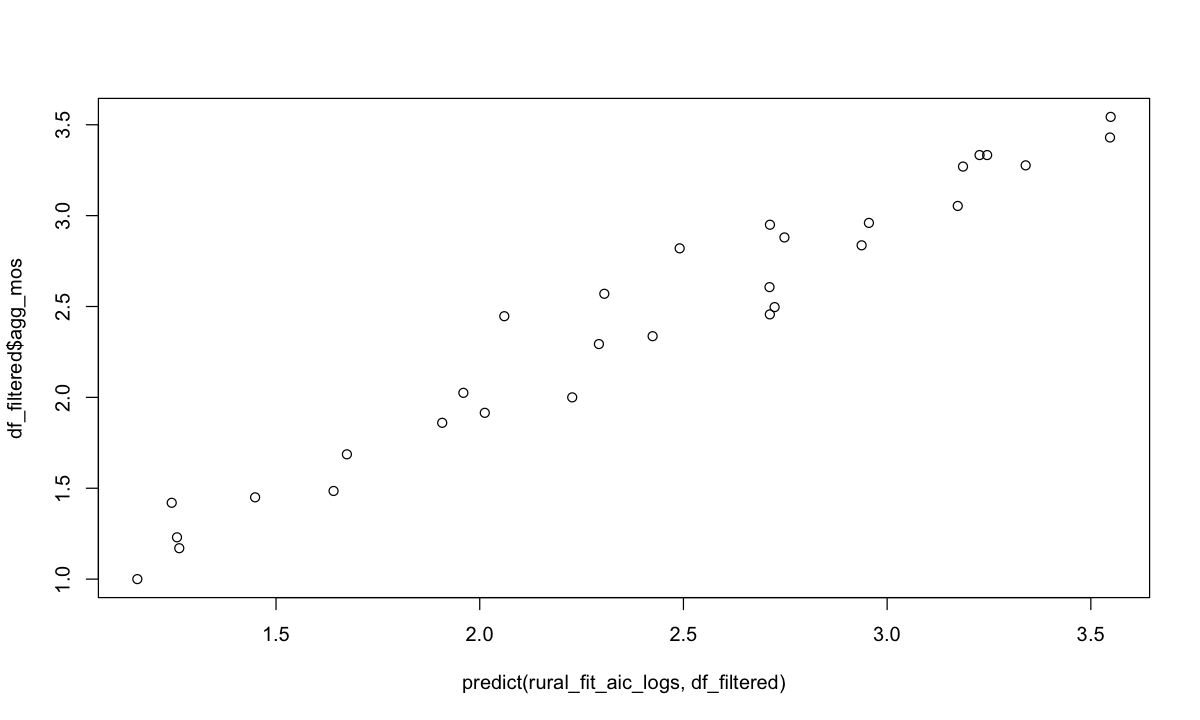

In [70]:
rural_fit_aic_logs <- step(model, k = log(length(objective$agg_mos)))

par(bg = "white")
plot(predict(rural_fit_aic_logs, df_filtered), df_filtered$agg_mos)
mean((predict(rural_fit_aic_logs, df_filtered) - df_filtered$agg_mos)^2)
model_summary <- summary(rural_fit_aic_logs)

# Extract coefficients and p-values
coefficients <- model_summary$coefficients

# Create a data frame with coefficients, p-values, and significance stars
output_df <- data.frame(
  Estimate = coefficients[, "Estimate"],
  `P-value` = coefficients[, "Pr(>|t|)"],
  Significance = cut(coefficients[, "Pr(>|t|)"],
                     breaks = c(-Inf, 0.001, 0.01, 0.05, 0.1, Inf),
                     labels = c("***", "**", "*", ".", " "),
                     right = FALSE)
)

# Print the formatted output
cat("Coefficients, P-values, and Significance:\n")
print(output_df)